In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy import signal
import imageio
from skimage import color

C:\Users\moham\AppData\Local\Temp\ipykernel_3604\2405617289.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('tiger.bmp')


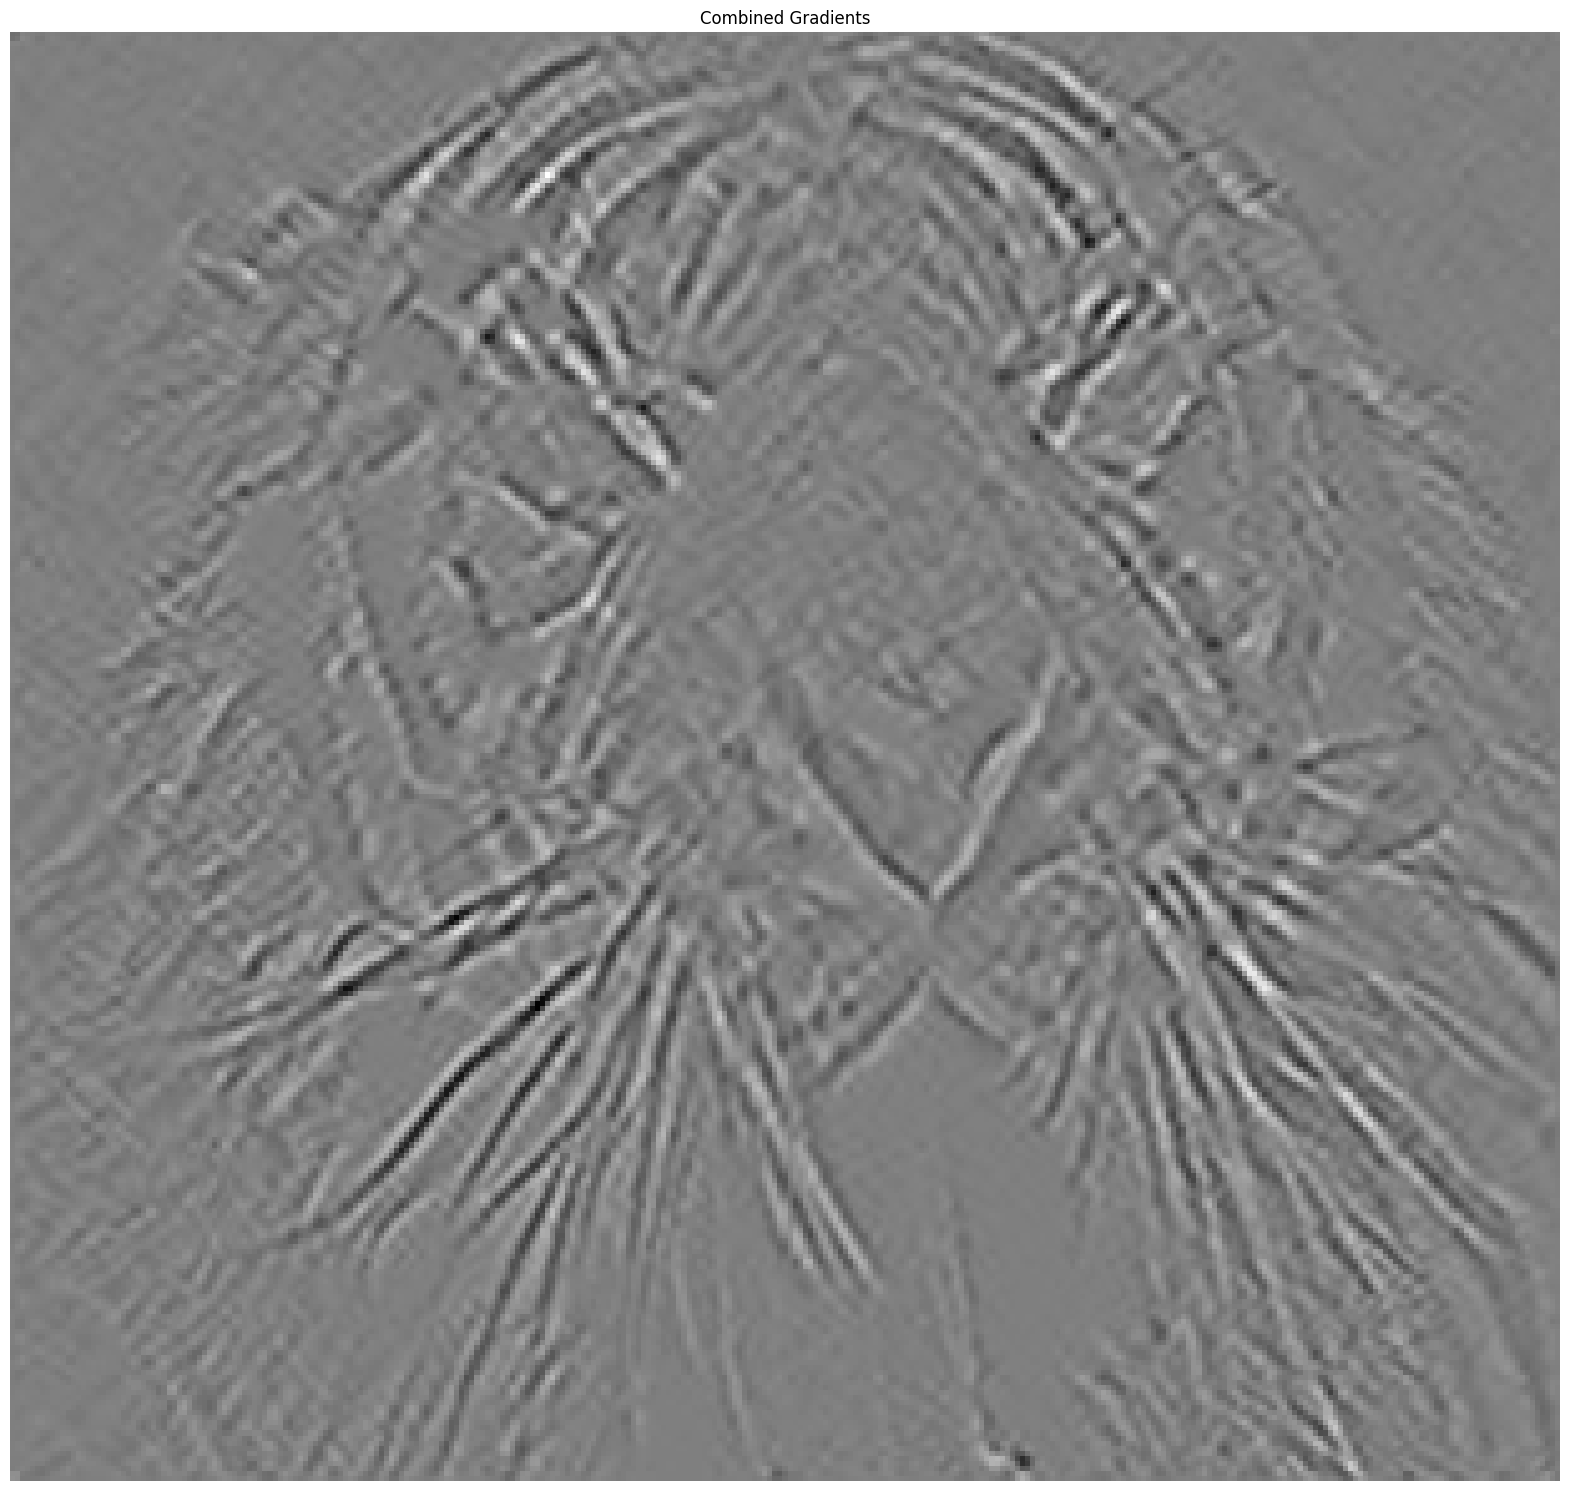

Each filter applies a simple difference operation in one direction,
emphasizing changes in pixel intensity that correspond to edges.
Applying both filters sequentially combines their effects, enhancing more complex edge patterns.
The value range changes due to the subtraction and addition of pixel values beyond the original 0-255 range.


In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve


image = imageio.imread('tiger.bmp')


image_float = image.astype('float32')


horizontal_filter = np.array([[1, 0, -1]])
vertical_filter = np.array([[1], [0], [-1]])


horizontal_gradient = convolve(image_float, horizontal_filter)


vertical_gradient = convolve(image_float, vertical_filter)

combined_gradient = convolve(horizontal_gradient, vertical_filter)


SIZE = 20;
f, axarr = plt.subplots(3, 1, figsize=(5*SIZE, 15*SIZE))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(horizontal_gradient, cmap='gray')
axarr[1].set_title('Horizontal Gradient')
axarr[1].axis('off')

axarr[2].imshow(vertical_gradient, cmap='gray')
axarr[2].set_title('Vertical Gradient')
axarr[2].axis('off')

plt.show()


f, ax1 = plt.subplots(figsize=(SIZE, 5*SIZE))
ax1.imshow(combined_gradient, cmap='gray')
ax1.set_title('Combined Gradients')
ax1.axis('off')
plt.show()

print("Each filter applies a simple difference operation in one direction,")
print("emphasizing changes in pixel intensity that correspond to edges.")
print("Applying both filters sequentially combines their effects, enhancing more complex edge patterns.")
print("The value range changes due to the subtraction and addition of pixel values beyond the original 0-255 range.")


C:\Users\moham\AppData\Local\Temp\ipykernel_3604\3884469219.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tiger_image = imageio.imread('tiger.bmp')
C:\Users\moham\AppData\Local\Temp\ipykernel_3604\3884469219.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  camera_image = imageio.imread('Camera_obscura.jpg')


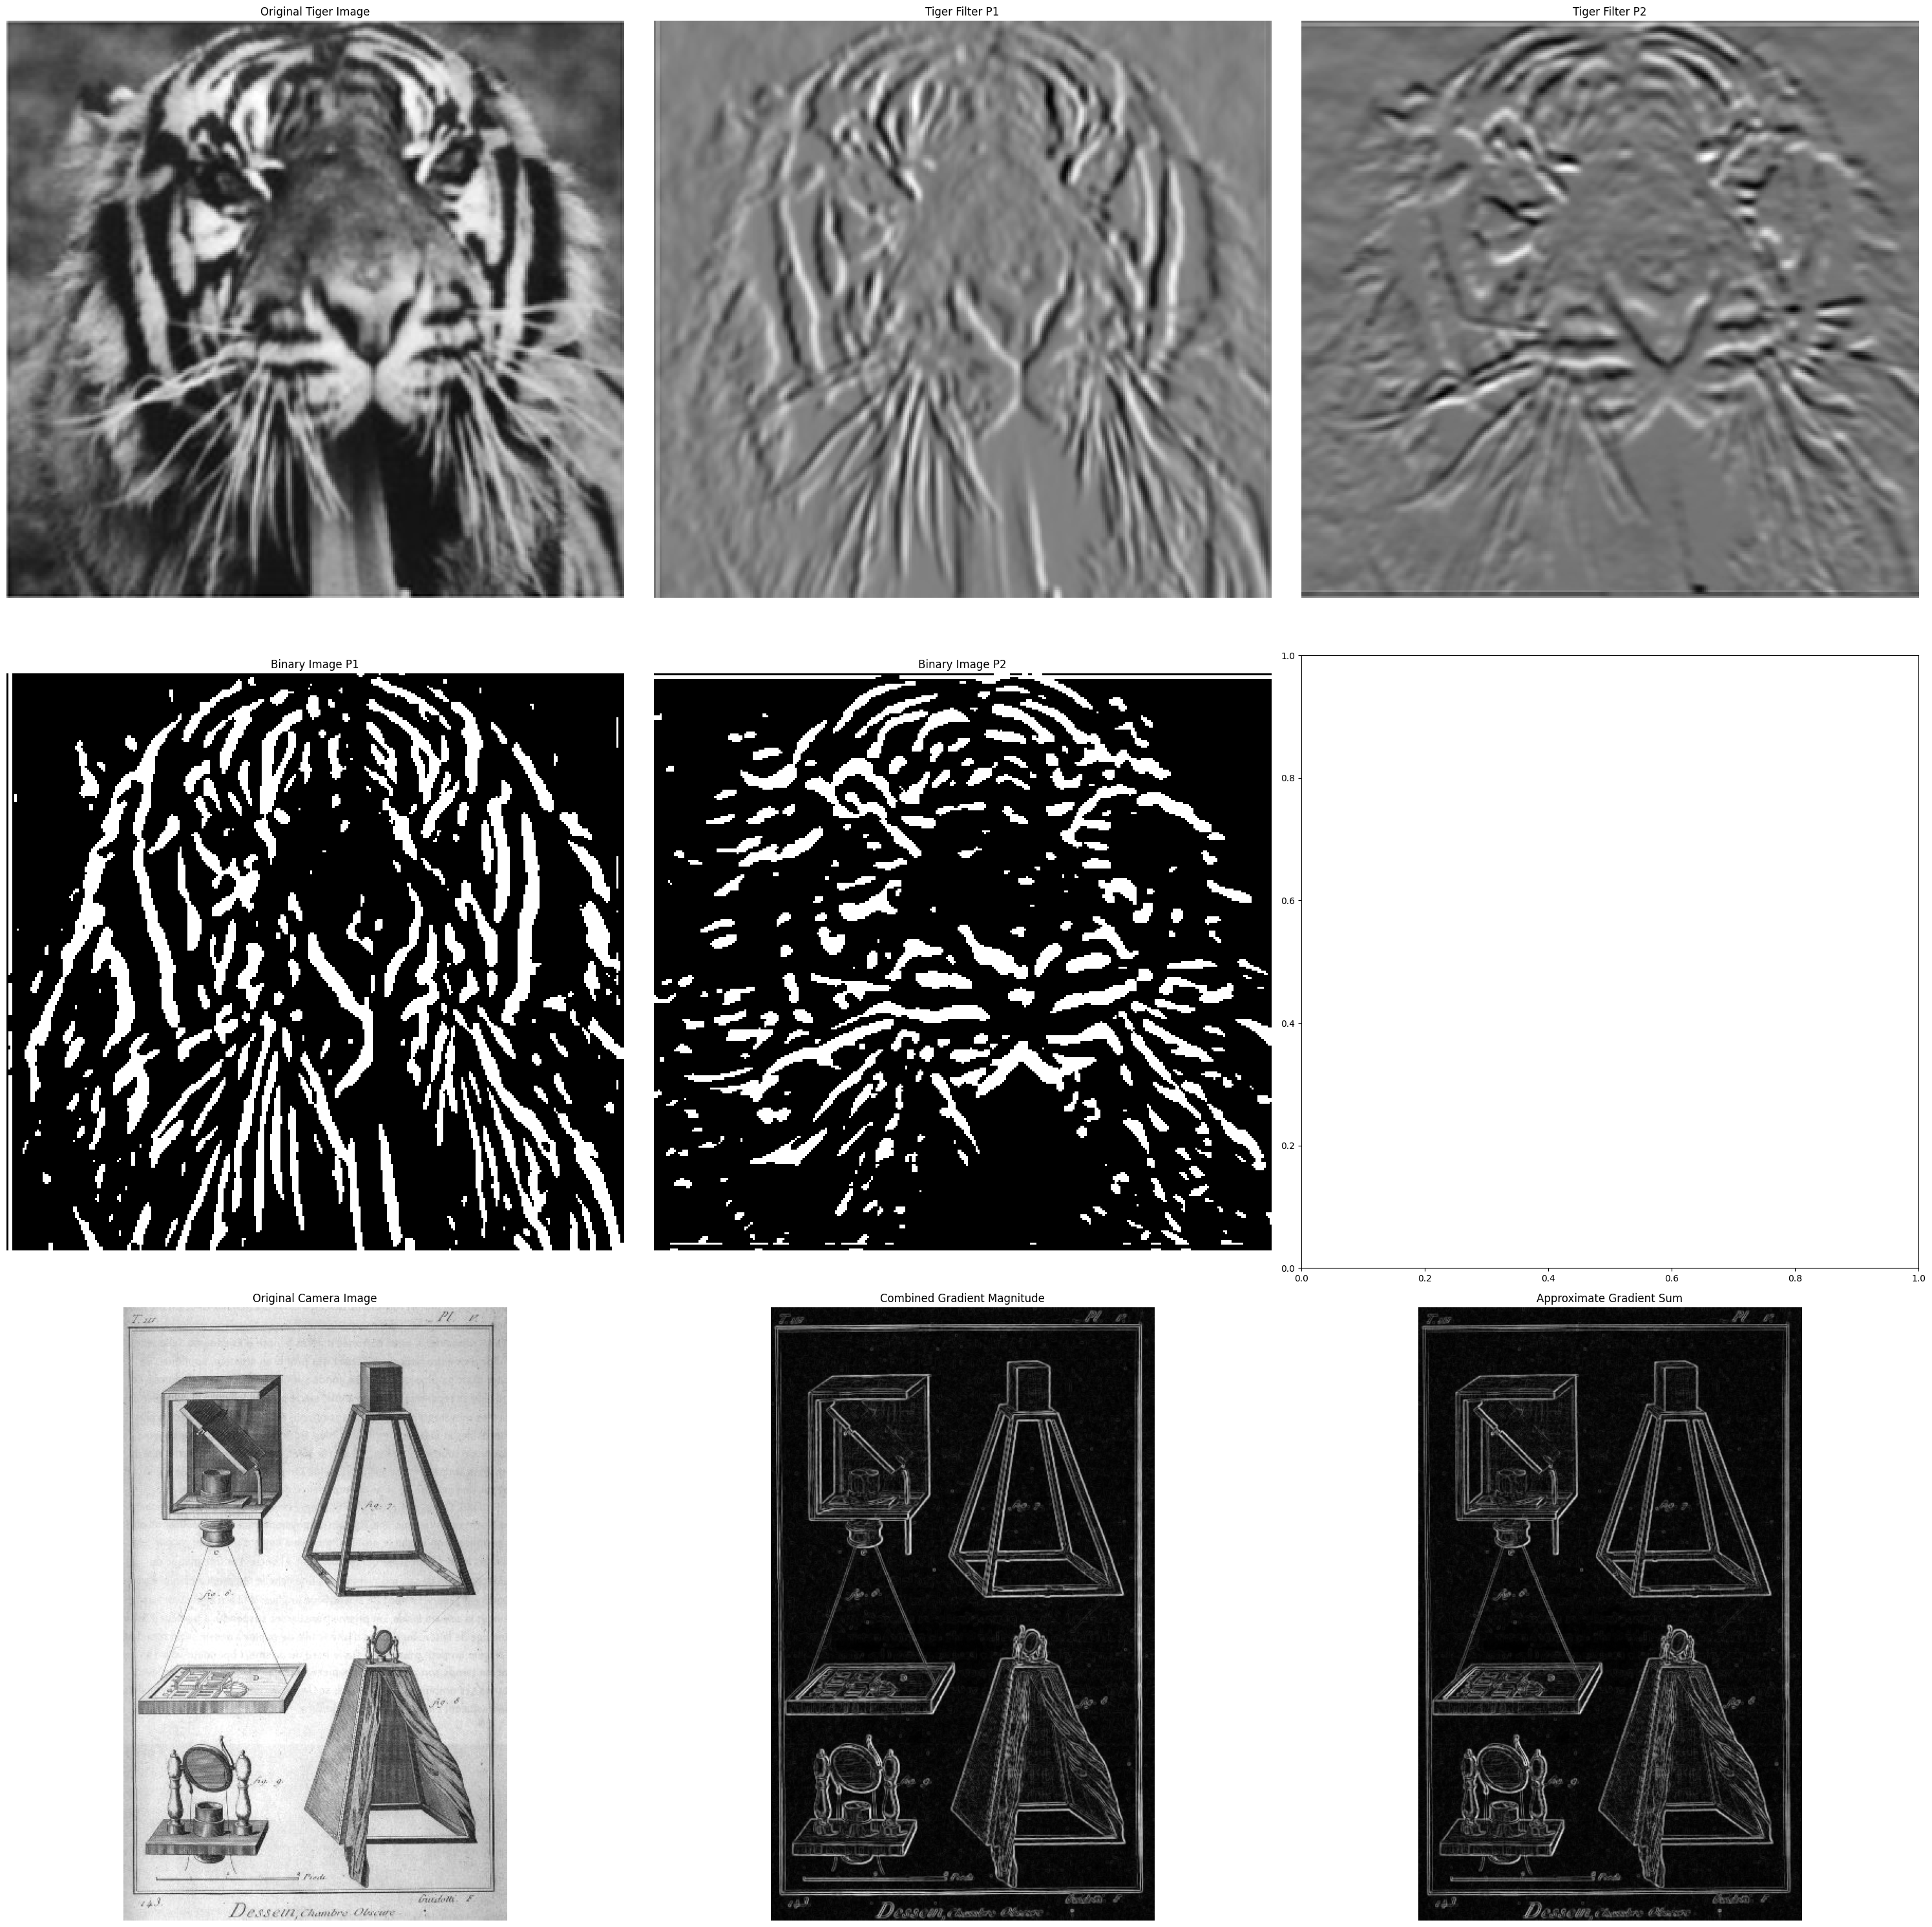

In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.color import rgb2gray

# Load the tiger image and convert to float
tiger_image = imageio.imread('tiger.bmp')
tiger_float = tiger_image.astype('float32')

# Define edge detection filters for the tiger image
P1 = np.array([[-1, 0, 0, 0, 1]] * 5)
P2 = np.array([[-1, -1, -1, -1, -1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 1, 1, 1, 1]])

# Apply the filters
result_P1 = convolve(tiger_float, P1)
result_P2 = convolve(tiger_float, P2)

# Threshold to create binary edge images
threshold = 100  # adjust this threshold based on image stats
binary_P1 = (result_P1 > threshold).astype(int)
binary_P2 = (result_P2 > threshold).astype(int)

# Load and process Camera_obscura image with Sobel filters
camera_image = imageio.imread('Camera_obscura.jpg')
if camera_image.ndim == 3:
    camera_image = rgb2gray(camera_image)
camera_float = camera_image.astype('float32')

# Sobel Operators
Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply Sobel Operators
sobel_x = convolve(camera_float, Gx)
sobel_y = convolve(camera_float, Gy)

# Combine the gradients
G = np.sqrt(sobel_x**2 + sobel_y**2)
G_approx = np.abs(sobel_x) + np.abs(sobel_y)

# Plotting the results
SIZE = 10
fig, axarr = plt.subplots(3, 3, figsize=(3*SIZE, 3*SIZE))

axarr[0, 0].imshow(tiger_image, cmap='gray')
axarr[0, 0].set_title('Original Tiger Image')
axarr[0, 0].axis('off')

axarr[0, 1].imshow(result_P1, cmap='gray')
axarr[0, 1].set_title('Tiger Filter P1')
axarr[0, 1].axis('off')

axarr[0, 2].imshow(result_P2, cmap='gray')
axarr[0, 2].set_title('Tiger Filter P2')
axarr[0, 2].axis('off')

axarr[1, 0].imshow(binary_P1, cmap='gray')
axarr[1, 0].set_title('Binary Image P1')
axarr[1, 0].axis('off')

axarr[1, 1].imshow(binary_P2, cmap='gray')
axarr[1, 1].set_title('Binary Image P2')
axarr[1, 1].axis('off')

axarr[2, 0].imshow(camera_image, cmap='gray')
axarr[2, 0].set_title('Original Camera Image')
axarr[2, 0].axis('off')

axarr[2, 1].imshow(G, cmap='gray')
axarr[2, 1].set_title('Combined Gradient Magnitude')
axarr[2, 1].axis('off')

axarr[2, 2].imshow(G_approx, cmap='gray')
axarr[2, 2].set_title('Approximate Gradient Sum')
axarr[2, 2].axis('off')

plt.tight_layout()
plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_3604\1223108271.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('SanFrancisco.jpg')


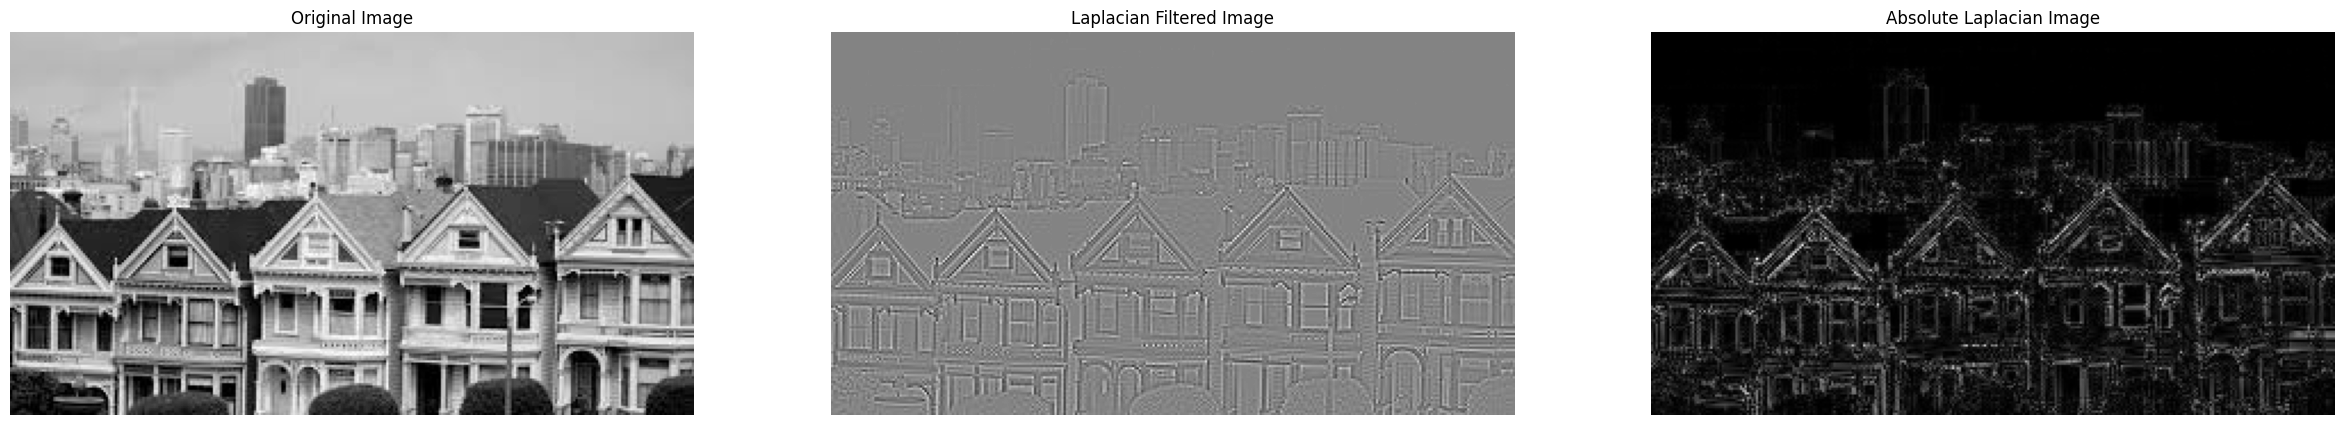

In [5]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.color import rgb2gray

# Load the image
image = imageio.imread('SanFrancisco.jpg')

# Check if the image is color and convert to grayscale
if image.ndim == 3:
    image = rgb2gray(image)

# Convert image to float type
image_float = image.astype('float32')

# Define the Laplacian filter (3x3)
laplacian_filter = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the Laplacian filter
laplacian_result = convolve(image_float, laplacian_filter)

# Compute the absolute value of the output
laplacian_absolute = np.abs(laplacian_result)

# Plotting the results
SIZE = 10
fig, axarr = plt.subplots(1, 3, figsize=(3*SIZE, SIZE))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(laplacian_result, cmap='gray')
axarr[1].set_title('Laplacian Filtered Image')
axarr[1].axis('off')

axarr[2].imshow(laplacian_absolute, cmap='gray')
axarr[2].set_title('Absolute Laplacian Image')
axarr[2].axis('off')

plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_3604\4263848687.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('tiger.bmp')


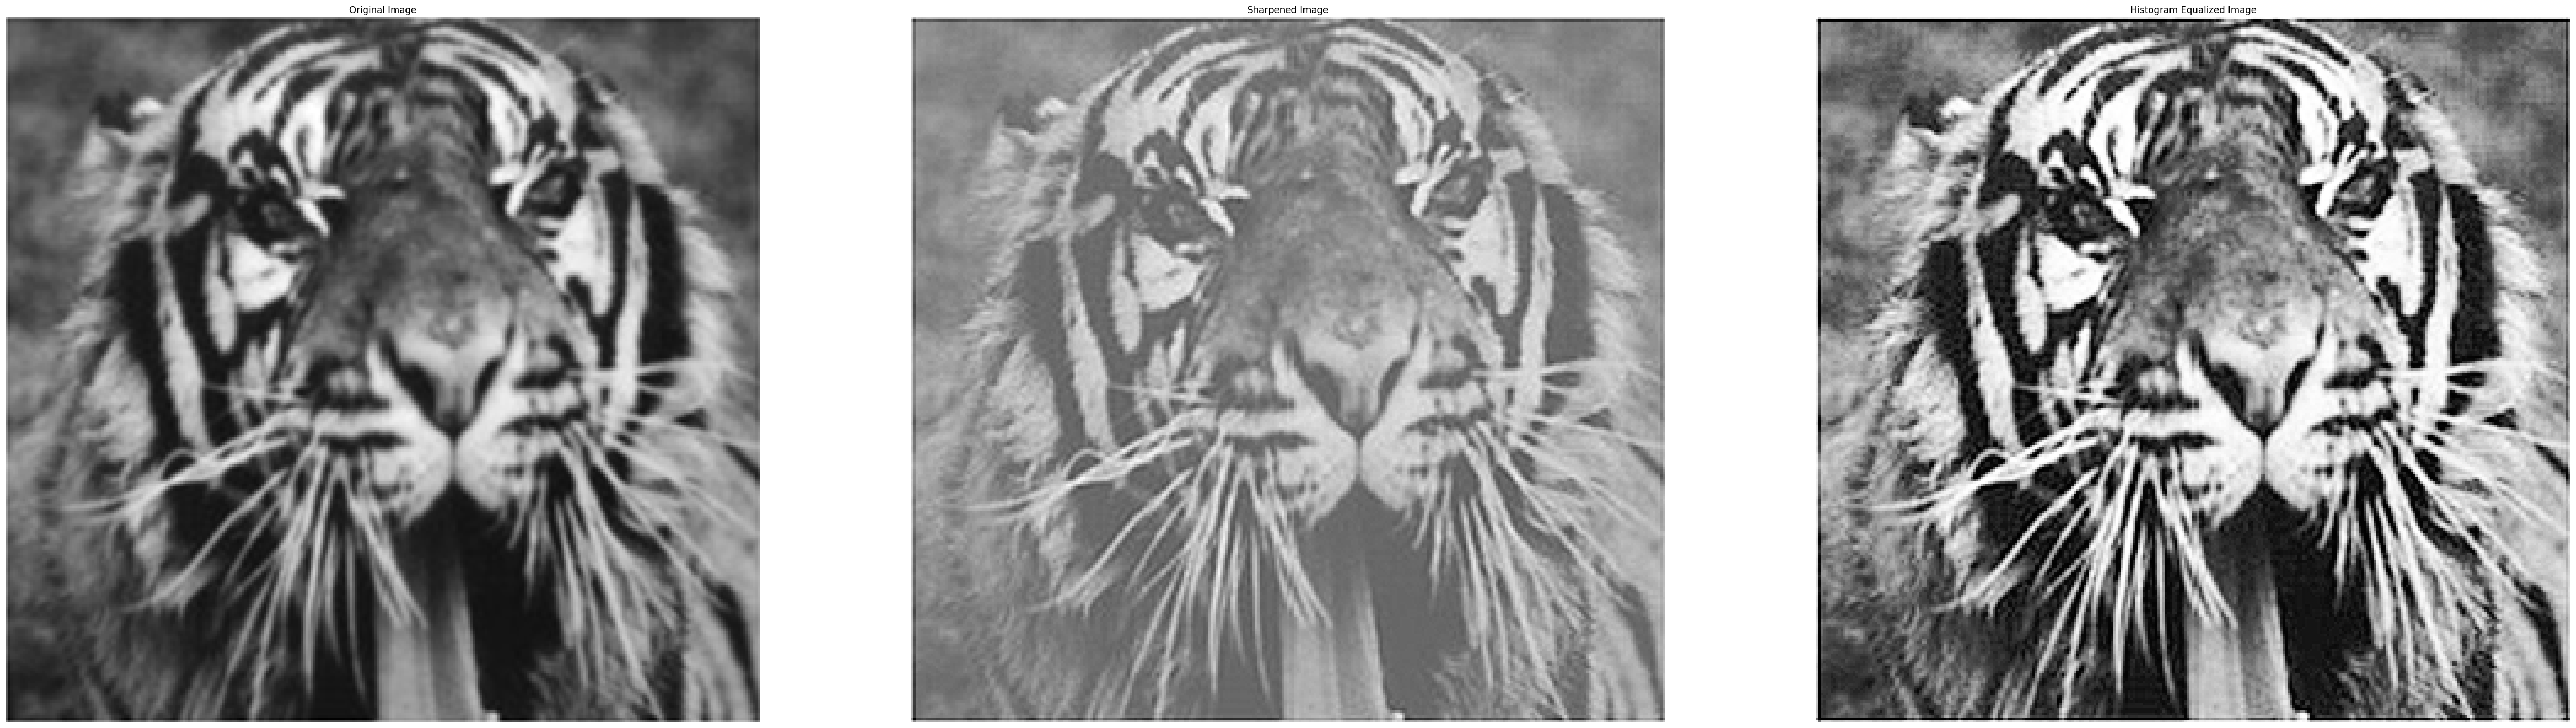

In [7]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import exposure

# Load the image
image = imageio.imread('tiger.bmp')

# Convert image to float type
image_float = image.astype('float32')

# Define the sharpening filter
sharpening_filter = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply the sharpening filter
sharpened_image = convolve(image_float, sharpening_filter)

# Apply histogram equalization to enhance contrast
equalized_image = exposure.equalize_hist(sharpened_image)

# Plotting the results
SIZE = 20
fig, axarr = plt.subplots(1, 3, figsize=(3*SIZE, SIZE))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(sharpened_image, cmap='gray')
axarr[1].set_title('Sharpened Image')
axarr[1].axis('off')

axarr[2].imshow(equalized_image, cmap='gray')
axarr[2].set_title('Histogram Equalized Image')
axarr[2].axis('off')

plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_3604\2176682253.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('SanFrancisco.jpg')


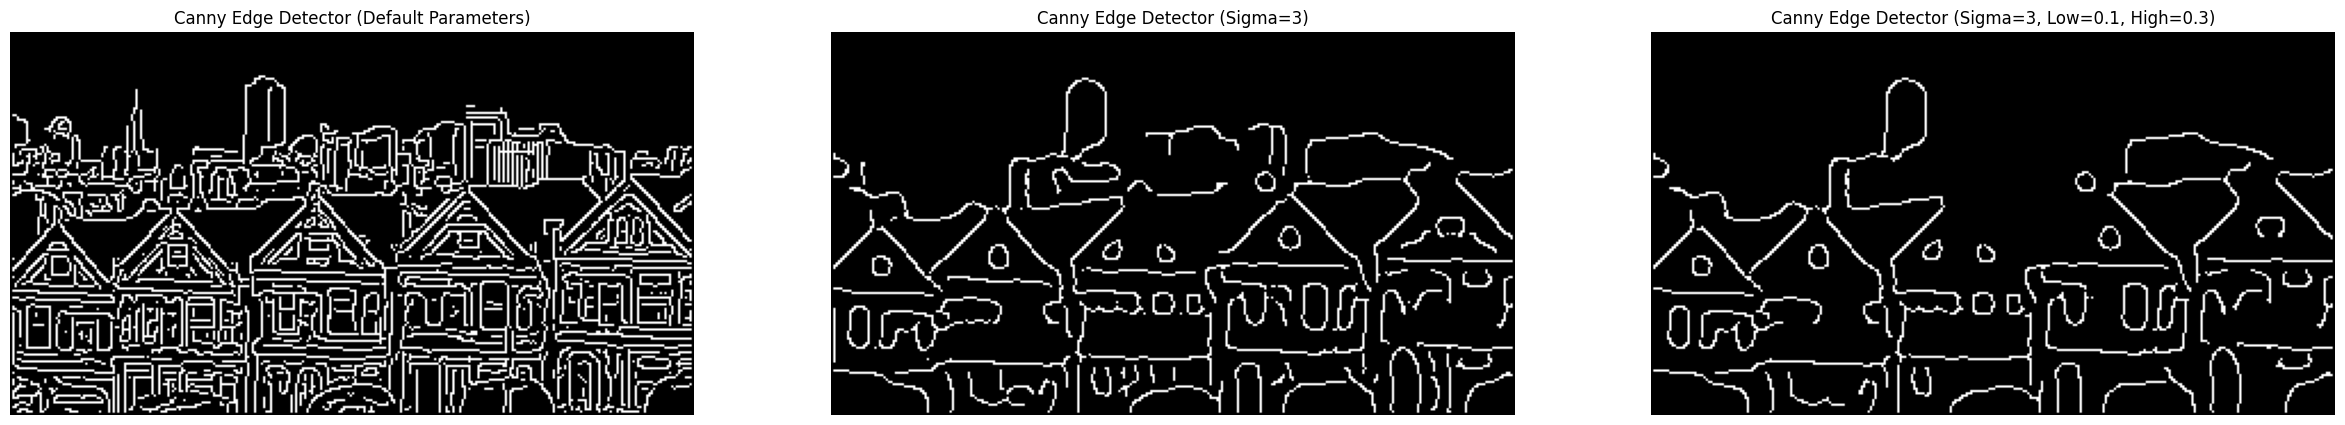

In [8]:
import imageio
from skimage import feature, color
import matplotlib.pyplot as plt

# Load the image
image = imageio.imread('SanFrancisco.jpg')

# Convert image to grayscale if it's not already
if image.ndim == 3:
    image = color.rgb2gray(image)

# Convert image to float type
image_float = image.astype('float32')

# Apply Canny edge detector with different parameters
edges1 = feature.canny(image_float)
edges2 = feature.canny(image_float, sigma=3)
edges3 = feature.canny(image_float, sigma=3, low_threshold=0.1, high_threshold=0.3)

# Plotting the results
SIZE = 10
fig, axarr = plt.subplots(1, 3, figsize=(3*SIZE, SIZE))

axarr[0].imshow(edges1, cmap='gray')
axarr[0].set_title('Canny Edge Detector (Default Parameters)')
axarr[0].axis('off')

axarr[1].imshow(edges2, cmap='gray')
axarr[1].set_title('Canny Edge Detector (Sigma=3)')
axarr[1].axis('off')

axarr[2].imshow(edges3, cmap='gray')
axarr[2].set_title('Canny Edge Detector (Sigma=3, Low=0.1, High=0.3)')
axarr[2].axis('off')

plt.show()


Your interpretation of the parameters of canny go here:

In [11]:
#Adjusting sigma impacts the degree of smoothness in the image and can lead to thicker or more blurred edges depending on the increase in value.
#Modifying threshold values allows you to fine-tune the sensitivity of edge detection. Lower threshold values mean more edges are detected, including potentially more noise, while higher values focus only on the most pronounced edges, reducing the total number of detected edges but enhancing the quality of those that are detected.

C:\Users\moham\AppData\Local\Temp\ipykernel_3604\2565126840.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('SanFrancisco.jpg')


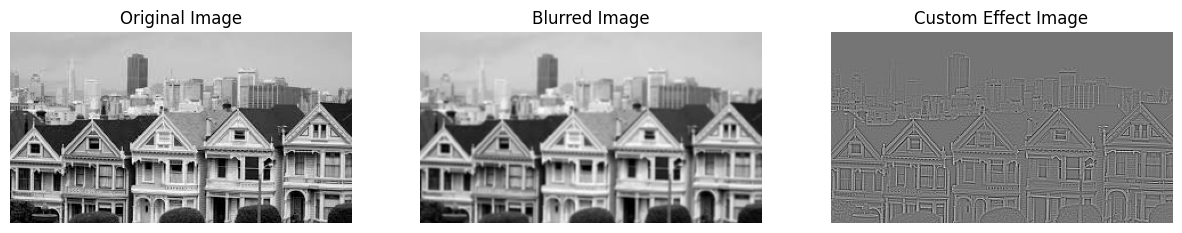

In [9]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image
image = imageio.imread('SanFrancisco.jpg')

# Ensure the image is grayscale; if not, convert it
if image.ndim == 3:
    image = np.mean(image, axis=2)  # Simple RGB to grayscale conversion

# Convert image to float type for processing
image_float = image.astype('float32')

# Define a simple blur filter
blur_filter = np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]]) / 16

# Apply the blur filter
blurred_image = convolve(image_float, blur_filter)

# Create a custom effect by subtracting the blurred image from the original
effect_image = image_float - blurred_image

# Normalize the result to avoid display issues
effect_image -= effect_image.min()
effect_image /= effect_image.max()
effect_image *= 255

# Plotting the results
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(blurred_image, cmap='gray')
axarr[1].set_title('Blurred Image')
axarr[1].axis('off')

axarr[2].imshow(effect_image, cmap='gray')
axarr[2].set_title('Custom Effect Image')
axarr[2].axis('off')

plt.show()
